In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt  
from PIL import Image

# store the data as pandas dataframe
train_data = pd.read_csv("/content/drive/MyDrive/enhanceIT/MNIST_train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/enhanceIT/MNIST_test.csv")

train_data


In [ ]:
# input - pandas data frame
# output - np arrays representing x and y value for the pd data
def pd_to_np (data):
  data_np = np.array(data)
  x = data_np[:,3:]
  y = data_np[:,2]

  return x,y

# obtain x and y values for both data
x_train,y_train = pd_to_np(train_data)

# split test set into validation and actual test set
vald_set = test_data.sample(frac = 0.5,random_state = 25)
test_set = test_data.drop(vald_set.index)

# change valid and test datat to np
vald_x,vald_y = pd_to_np(vald_set)
x_test,y_test = pd_to_np(test_set)


In [52]:
# function for printing the actual image of an observation
def print_num( data,index):
  im = data.to_numpy()
  print(im[index,2])
  im = im[index,3:]
  
  pixels = np.array(im)
  


  pixels = np.array(pixels, dtype = 'int64')
 # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

        # Plot
  plt.imshow(pixels, cmap='gray')
  plt.show()


In [8]:
class KNNClassifier ():

  def fit(self,x,y):
    self.x = x
    self.y = y
  
  def predict (self, x, k, epsilon = [1e-3]):
    N = len(x)
    y_hat = np.zeros((len(epsilon),N))

    for i in range(N):
      if i % 100 == 0:
        print(i)
      dist_sq = np.sum((self.x - x[i])**2, axis = 1)
      index = np.argsort(dist_sq)[:k]
      
      temp = dist_sq[index]
      for j,e in enumerate(epsilon):
        gamma_k = 1/(np.sqrt(temp+e))
        y_hat[j][i] = np.bincount(self.y[index],weights=gamma_k).argmax()

    return y_hat

In [29]:
knn = KNNClassifier()
knn.fit(x_train,y_train)

# use multiple epsilon values if needed
eps = [1e-3,0.5e-3,0.25e-3,0.1e-3,1e-4]

y_hat = knn.predict(x_test,4)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [31]:
def accuracy  (y, y_hat):
  return np.mean(y == y_hat)
for i in y_hat:
  print(accuracy(i,y_test))


0.9694


Text(0.5, 42.0, 'Predicted label')

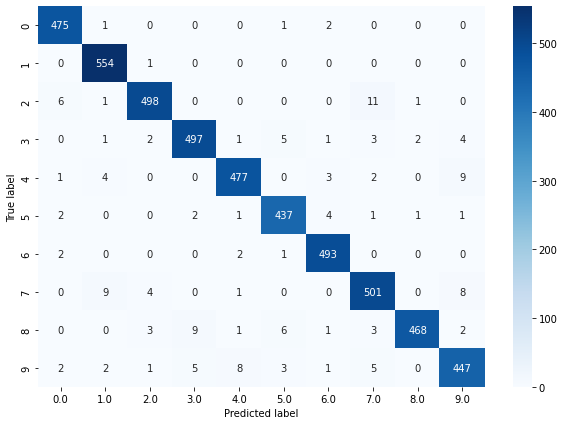

In [33]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat[0], name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.ylabel('True label')
plt.xlabel('Predicted label')